<a href="https://colab.research.google.com/github/leonel1301/UberPeru-Trips-Network/blob/main/TP_Complejidad_Algor%C3%ADtmica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UberPeru-Trips-Network

**Importing Libraries**

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

**Loading the dataset from Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path_to_uber_dataset = '/content/drive/MyDrive/uber_peru_2010_2.csv'
data = pd.read_csv(path_to_uber_dataset, delimiter=';' )



In [ ]:
data.head()

,journey_id,user_id,driver_id,start_lat,start_lon,end_lat,end_lon,driver_start_lat,driver_start_lon,distance,duration
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,"-1,213,983,536","-7,702,355,957","-1,205,537,033","-770,413,208","-1,210,825,481","-770,272,739",11331,234
1,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,"-1,208,995,438","-7,692,626,953","-1,202,223,206","-7,710,638,428","-1,208,311,558","-769,277,072",30270,715
2,2254715f0f569e3173ec61f16cbb8341,56772d544fdfa589a020a1ff894a86f7,baacf396f773709519bbde35a5eab861,"-1,202,241,898","-7,710,650,635","-1,208,980,179","-7,692,608,643","-1,201,706,754","-7,705,986,526",29080,1201
3,12432d83b49393bf25164673212b8295,56772d544fdfa589a020a1ff894a86f7,e1332f68e81526e498e4d845233a6d7d,"-1,208,995,819","-769,262,085","-1,202,152,252","-7,710,623,169","-1,208,509,125","-7,696,944,424",27230,0
4,2e51db3a8a77aa594aa686ff19fe6036,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,"-1,211,347,198","-7,704,385,376","-1,209,108,734","-7,692,266,846","-1,210,828,994","-7,703,530,221",17247,232


**Creating of the graph G and showing basic analysis of the data**

In [ ]:
# Crear nuevas columnas que combinen las coordenadas de inicio y fin
data['start_coord'] = data['driver_start_lat'].astype(str) + ', ' + data['driver_start_lon'].astype(str)
data['end_coord'] = data['start_lat'].astype(str) + ', ' + data['start_lon'].astype(str)

# Crear un grafo dirigido utilizando NetworkX
G = nx.from_pandas_edgelist(data, source='start_coord', target='end_coord', edge_attr=True, create_using=nx.DiGraph())

# Eliminar lazos cíclicos
G.remove_edges_from(nx.selfloop_edges(G))

# Análisis Básico
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

Number of nodes: 26057
Number of edges: 16110


**Creating a graph of the first 1500 nodes of G**

In [ ]:
# Obtener los primeros 20 nodos
first_n_nodes = list(G.nodes)[:1500]

# Crea un subgrafo con los primeros 20 nodos y sus bordes
subgraphG = G.subgraph(first_n_nodes)

**Graphing my 1500 nodes graph**

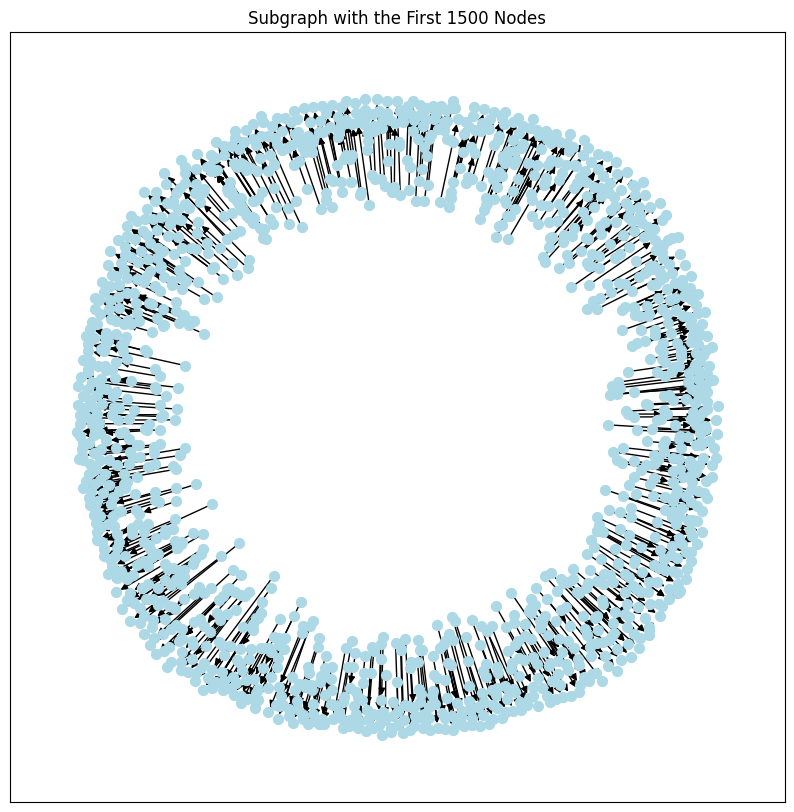

In [ ]:
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(subgraphG, seed=10)
nx.draw_networkx(subgraphG, pos, with_labels=False, node_size=50, node_color='lightblue', font_size=8)
plt.title("Subgraph with the First 1500 Nodes")


plt.show()